# Linear Regression

## Exercise

本项目使用 PyTorch 进行一个简单的线性回归实验，基于单个特征来预测目标变量。

**数据生成**:
- 我们使用 `sklearn.datasets.make_regression()` 生成 100 个样本，每个样本包含：
  - 一个特征变量 `X`，用于预测目标变量 `y`
  - 目标变量 `y` 受 `X` 影响，并加入一定的噪声

**任务列表**:
1. **数据转换**:
   - **TODO:** 使用 `torch.from_numpy()` 将 `X_numpy` 和 `y_numpy` 转换为 PyTorch 的 `tensor`。

2. **定义线性回归模型**:
   - 实现 `LinearRegressionModel`，包含一个 `nn.Linear(1,1)` 层。

3. **选择损失函数**:
   - **TODO:** 采用均方误差损失函数 `nn.MSELoss()`。

4. **选择优化器**:
   - **TODO:** 采用随机梯度下降 (SGD) 并设置学习率 `0.01`。

5. **训练模型**:
   - **TODO:** 在每轮训练中：
     - 进行前向传播，使用模型对 `X` 进行预测。
     - 计算损失。
5. **画图**:
   - **TODO:** 将tensor结果转换为numpy进行画图

## Inport 

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


## Prepare data



In [8]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=30, random_state=4)

# TODO: 将X_numpy, y_numpy转换为tensor
X = torch.from_numpy(X_numpy).float()
y = torch.from_numpy(y_numpy).float()

y = y.view(y.shape[0], 1)
# view 与 reshape 类似，都是用来改变张量的形状。不同之处在于，view 只能在内存连续的情况下使用，而 reshape 可以处理非连续的张量。

n_samples, n_features = X.shape

## Model


In [9]:
# Linear model f = wx + b
input_size = n_features
output_size = 1

# TODO: 创建一个线性模型，使用 PyTorch 提供的 nn.Linear
model = nn.Linear(input_size, output_size)

## Loss and optimizer

In [11]:
# TODO: 选择损失函数，使用均方误差损失函数 (MSELoss)
criterion = nn.MSELoss()

# TODO: 选择优化器，使用随机梯度下降 (SGD) 并设置学习率
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

 ## Training loop

In [12]:
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    # TODO: 进行前向传播，使用模型对 X 进行预测
    y_predicted = model(X)
    
    # TODO: 计算损失，使用前面定义的损失函数
    loss = criterion(y_predicted, y)
    

    # Backward pass and update
    loss.backward()

    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



epoch: 10, loss = 4304.5562
epoch: 20, loss = 3144.1826
epoch: 30, loss = 2352.8667
epoch: 40, loss = 1813.1179
epoch: 50, loss = 1444.8875
epoch: 60, loss = 1193.6211
epoch: 70, loss = 1022.1337
epoch: 80, loss = 905.0730
epoch: 90, loss = 825.1498
epoch: 100, loss = 770.5730


## plot

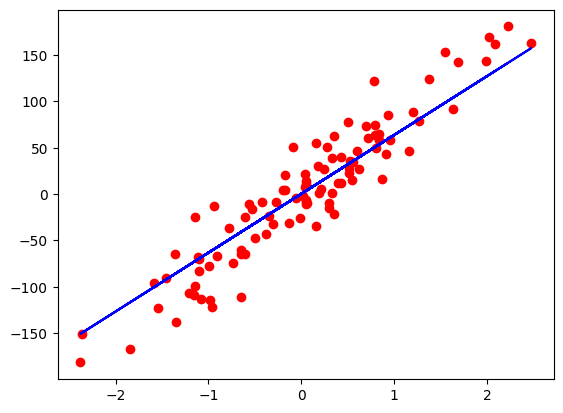

In [13]:
# Plot
# TODO: 将输出先从计算图中分离，然后转为numpy
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()